In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
#import mplleaflet
import pandas as pd
import matplotlib.dates as dates


df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

df['temperature'] = df['Data_Value'] / 10

df['datetime'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df['month-day'] = df['datetime'].dt.strftime('%m-%d')
df['year'] = df['datetime'].dt.year
df['fake_date'] = pd.to_datetime(df['month-day'], format='%m-%d')

df.head()

ValueError: day is out of range for month

In [13]:
def get_highs_lows_pre_2015():
    
    """
    Get the record highs and lows for years before 2015 and return a Data Frame
    """
    
    # Remove data from before 2015
    df = setup_data()
    df = df[df.Year < 2015]
    
    # Get the max and min based on DayOfYear
    result = df.groupby('DayOfYear')['Temperature'].agg(['max', 'min']).reset_index()
    
    # Create float representation of DayOfYear
    result['fds'] = result['DayOfYear'].apply(lambda x: dates.date2num(x))
    
    return result

test = get_highs_lows_pre_2015()
test.head()

,DayOfYear,max,min,fds
0,1900-01-01,15.6,-16.0,693596.0
1,1900-01-02,13.9,-26.7,693597.0
2,1900-01-03,13.3,-26.7,693598.0
3,1900-01-04,10.6,-26.1,693599.0
4,1900-01-05,12.8,-15.0,693600.0


In [14]:
def get_highs_lows_2015():
    
    """
    Get the record highs and lows that occurred in 2015
    """
    
    pre2015 = get_highs_lows_pre_2015()
    df = setup_data()
    df = df[df.Year == 2015]
        
    # Get the max and min based on DayOfYear in 2015
    df2015 = df.groupby('DayOfYear')['Temperature'].agg(['max', 'min']).rename(columns={'max': 'max2015', 'min': 'min2015'}).reset_index()
    
    # Merge the pre2015 and 2015 DataFrames
    result = pd.merge(pre2015, df2015, how='outer', left_on='DayOfYear', right_on='DayOfYear')
    
    # Determine if min or max is more extreme than pre2015
    result['min_record_in_2015'] = result['min2015'] < result['min']
    result['max_record_in_2015'] = result['max2015'] > result['max']
    
    # Remove the rows with both values False
    result = result[(result.min_record_in_2015 == True) | (result.max_record_in_2015 == True)]
    
    return result

test = get_highs_lows_2015()
len(test)

68

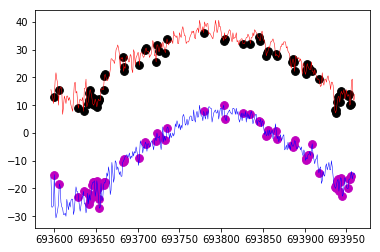

In [16]:
# Create new figure
plt.figure()

# Plot the record low and high from 2005-2014
pre2015 = get_highs_lows_pre_2015()
plt.plot(pre2015['fds'], pre2015['min'], color='b', lw=0.5, label='record low 2005-2014')
plt.plot(pre2015['fds'], pre2015['max'], color='r', lw=0.5, label='record high 2005-2014')

# Plot the scatter points of records broken in 2015
df2015 = get_highs_lows_2015()
plt.scatter(df2015['fds'], df2015['min'], color='m', marker='o', s=60, label='record low achieved in 2015')
plt.scatter(df2015['fds'], df2015['max'], color='k', marker='o', s=60, label='record high achieved in 2015')

# ax = plt.gca()

# # Set date axis format
# ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%d'))
# ax.xaxis.set_major_locator(dates.MonthLocator())
# loc, labels = plt.xticks()
# plt.setp(labels, rotation=90)

# # Make the x-axis go through y=0 and remove right and top spines
# #ax.spines['bottom'].set_position('zero')
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# # Add a plot title and legend
# #plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
# plt.subplots_adjust(bottom=0.15)
# plt.legend(loc='best')
# plt.ylabel('Temperature (Deg C)')
# plt.title('Record Temperatures for each Day of the Year')

# # fill the area between the record low and highs from 2005-2014
# plt.gca().fill_between(pre2015['fds'], 
#                        pre2015['min'], pre2015['max'], 
#                        facecolor='blue', 
#                        alpha=0.25)

# # Show the plot
# plt.show()